# 3. Laboratorijske vježbe iz Numeričke matematike- zad 3

Ime i prezime: *Fran Ostroški*

a) Želimo odrediti godinu $\hat t$ u kojoj će ukupan broj ljudi na Zemlji prijeći 9.5 milijardi.  Populacija se računa prema Verhulstovom modelu
$$f(t)=\frac{a}{1-ce^{-dt}}$$
pri čemu su dani paramteri:
$$a=9.9606,\quad c=-1.1085\cdot 10^{25},\quad d=0.029.$$
(vrijednost $f(t)$ računa se u milijardama). Zadatak formulirajte u obliku nelinearne jednadžbe koju treba riješiti i nacrtajte funkciju čiju nultočku tražite na intervalu $[1950, 2200]$

Odgovor: 
Treba riješiti jednadžbu :
$$ f(x) = \frac{a}{1-ce^{-dx}} - 9.5 = 0$$

odnosno, nakon uvrštavanja a,c i d :

$$ f(x) = \frac{9.9606}{1-(-1.1085 \cdot 10^{25}) \cdot e^{-0.029x}} - 9.5 = 0


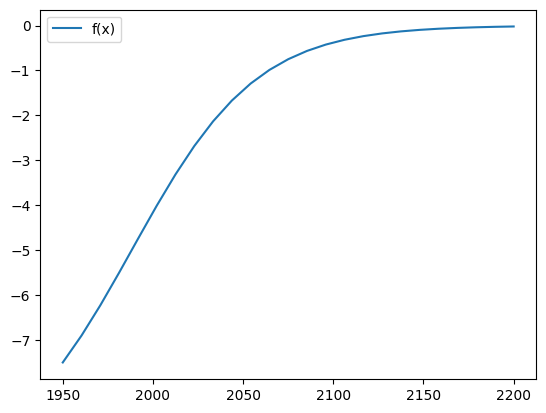

In [2]:
# Ovdje ide graf funkcije i jedna Markdown linija u kojoj ćete zapisati svoju nelinearnu jednadžbu

import matplotlib.pyplot as plt
import numpy as np

def fx(x):
    return (9.9606 / (1- (-1.1085 * 10**25)*np.exp(-0.029*x))) - 9.9606


x = np.linspace(1950,2200,25)
y = fx(x)

plt.plot(x,y)
plt.legend(['f(x)'])



b) Napišite  sada kako glasi iterativni postupak za danu funkciju ako koristite metodu sekante.

Postupak: Metoda sekante aproksimira derivaciju umjesto direktnog računanja derivacije kao u klasičnoj Newtonovoj metodi. Zato, u svakom koraku iteracije derivaciju $$ f'(x_{\text{n}}) $$ aproksimiramo izrazom $$  \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$$ pa onda iterativno računamo prema ovoj formuli: $$f(x_{n+1}) = x_n - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$ sve dok ne zadovoljimo zadani uvjet zaustavljanja.

c) Implementirajte metodu sekante koja uzima dvije početne iteracije (za jednu od početnih iteracija uzmite $t_0=1974$, a drugu po izboru). Kao uvjet zaustavljanja možete postaviti neki od sljedećih uvjeta: $|f(x_n)|\leq \varepsilon_1$, $|x_{n+1}-x_n|\leq \varepsilon_2$ ili određeni maksimalni broj iteracija, ako nije neki od prethodna 2 uvjeta zadovoljen. Napišite nekoliko vrijednosti niza $x_n$. Za provjeru, ispišite vrijednost funkcije u izračunatoj nultočki.

In [55]:
def sekanta(x0, x1, f, max_iterations = 100,epsilon = 1e-6):
    
    n = 0
    x = x1

    while abs(f(x)) > epsilon and n < max_iterations:
    
        x_next = x - f(x) * (x - x0) / (f(x) - f(x0))

        x0 = x
        x = x_next
        n += 1

        if n < 7:
            print("Xn (iteracija{}): {}".format(n, x_next))
    
    if abs(f(x)) <= epsilon:

        print("Uvjet zaustavljanja zadovoljen: x = {}, broj iteracija: {} ".format(x, n))
        return x
    else:
        print("Maksimalan broj iteracija postignut({}): x = {} ".format(max_iterations, x))
        return None
        

sekanta(1974,1989,fx)
print("------------------------")
sekanta(1974,1989,fx,10)
print("------------------------")
sekanta(1974,1989,fx,100,1e-10)
print("------------------------")
sekanta(1974,1989,fx,1000,1e-14)


Xn (iteracija1): 2058.485043184998
Xn (iteracija2): 2079.719136177585
Xn (iteracija3): 2107.949438986009
Xn (iteracija4): 2131.8045256162964
Xn (iteracija5): 2156.473747408901
Xn (iteracija6): 2180.4506113716207
Uvjet zaustavljanja zadovoljen: x = 2563.119313095869, broj iteracija: 22 
------------------------
Xn (iteracija1): 2058.485043184998
Xn (iteracija2): 2079.719136177585
Xn (iteracija3): 2107.949438986009
Xn (iteracija4): 2131.8045256162964
Xn (iteracija5): 2156.473747408901
Xn (iteracija6): 2180.4506113716207
Maksimalan broj iteracija postignut(10): x = 2276.2861617470535 
------------------------
Xn (iteracija1): 2058.485043184998
Xn (iteracija2): 2079.719136177585
Xn (iteracija3): 2107.949438986009
Xn (iteracija4): 2131.8045256162964
Xn (iteracija5): 2156.473747408901
Xn (iteracija6): 2180.4506113716207
Uvjet zaustavljanja zadovoljen: x = 2873.840398965721, broj iteracija: 35 
------------------------
Xn (iteracija1): 2058.485043184998
Xn (iteracija2): 2079.719136177585
Xn (

3185.4968934433423

d) Dobivenu nultočku usporedite s onom koju dobijete nekom ugrađenom metodom [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar). Odaberite metodu po izboru od onih koje smo obradili na predavanjima.

In [40]:
#kod
import scipy
from scipy.optimize import root_scalar

result = root_scalar(fx, x0=1974, x1=1989, method='secant')
print(result)

print("-----------------------")

result2 = root_scalar(fx,x0=1974,x1=1989,method='newton')
print(result2)

      converged: False
           flag: convergence error
 function_calls: 52
     iterations: 50
           root: 3225.679680061339
-----------------------
      converged: False
           flag: convergence error
 function_calls: 46
     iterations: 23
           root: 2780.565575504116


/Users/franostroski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scipy/optimize/_zeros_py.py:318: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


e) Upotrijebite neku od funkcija iz SciPy biblioteke, poput [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve)  ili [link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html#scipy.optimize.broyden1) da pronađete rješenje 2 točke u kojima se kružnice
$$(x-2)^2+y^2=4$$
$$x^2+(y-3)^2=4$$
sijeku. Iz skice procijenite koje bi mogle biti pogodne početne iteracije da dobijete svaku od tih točaka.

In [54]:
from scipy.optimize import broyden1
from scipy.optimize import fsolve

def kruznice(vars):
    x, y = vars
    eq1 = (x - 2)**2 + y**2 - 4
    eq2 = x**2 + (y - 3)**2 - 4
    return [eq1, eq2]

poc_iter = [1.7, 2]
poc_iter2 = [0.1, 1]  

result = broyden1(kruznice, poc_iter)
print("Pomoću Broydena:",result)
result2 = fsolve(kruznice, poc_iter)
print("Pomoću fsolve:", result2)

print("------  Za drugu procjenu: ---------------")

result3 = broyden1(kruznice, poc_iter2)
print("Pomoću Broydena:",result3)
result4 = fsolve(kruznice, poc_iter2)
print("Pomoću fsolve:", result4)




Pomoću Broydena: [1.72057661 1.9803844 ]
Pomoću fsolve: [1.72057669 1.98038446]
------  Za drugu procjenu: ---------------
Pomoću Broydena: [0.2794234  1.01961567]
Pomoću fsolve: [0.27942331 1.01961554]
